<a href="https://colab.research.google.com/github/LuchoValr/The-effect/blob/main/the_effect_cap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Describing variables

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
!pip install causaldata
from causaldata import Mroz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for causaldata: filename=causaldata-0.1.3-py3-none-any.whl size=2645615 sha256=8a861cc526820038a6c7247b7f60e9ace684f68f717907989a2c2091dc2c72fd
  Stored in directory: /root/.cache/pip/wheels/ce/0b/ea/6688ee5db67bccf7d9e46882bf80ad0959a3d6de15b4352254
Successfully built causaldata


In [5]:
#Reading data
dt = Mroz.load_pandas().data
#Keep working women
dt = dt[dt['lfp'] == True]
#Create unlogged eranings
dt.loc[:,'earn'] = dt['lwg'].apply('exp')

<ipython-input-5-42ac1fe95747>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.loc[:,'earn'] = dt['lwg'].apply('exp')


[None, None]

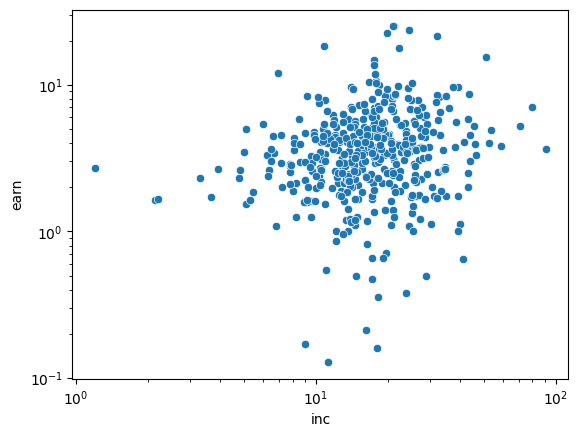

In [6]:
#Scatterplot
sn.scatterplot(x = 'inc', y = 'earn', data = dt).set(xscale = 'log', yscale = 'log')
#The .set() nos da escalas logaritmicas

In [7]:
#obtener la media condicional por college attendance
#wc es la college variable
dt.groupby('wc')[['earn']].mean()

,earn
wc,
False,3.583539
True,5.349448


In [8]:
#Obtener media condicional por bins
#usamos 10 bins
dt.loc[:, 'inc_bin'] = pd.cut(dt['inc'], 10)
dt.groupby('inc_bin')[['earn']].mean()

,earn
inc_bin,
"(-0.12, 9.074]",3.091594
"(9.074, 18.177]",3.826430
"(18.177, 27.28]",4.954454
"(27.28, 36.383]",4.563332
"(36.383, 45.485]",4.241790
"(45.485, 54.588]",6.139739
"(54.588, 63.691]",3.825000
"(63.691, 72.794]",5.232558
"(72.794, 81.897]",7.015306


<Axes: xlabel='linc', ylabel='lwg'>

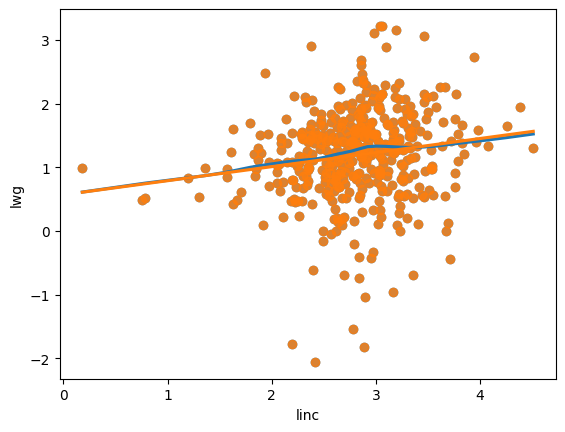

In [12]:
#Dibujamos la curva LOESS y una curva de regresion lineal
#Realizamos log antes de proceder
dt.loc[:, 'linc'] = dt['inc'].apply('log')

sn.regplot(x = 'linc',
           y = 'lwg',
           data = dt,
           lowess = True)
sn.regplot(x = 'linc',
           y = 'lwg',
           data = dt,
           ci = None)

In [13]:
#Corremos una regresion linear con variables de control
m1 = sm.ols(formula = 'lwg ~ linc', data = dt).fit()
print(m1.summary())
#k5 son numeros de niños menores a 5 años en un hogar
m2 = sm.ols(formula = 'lwg ~ linc + wc + k5', data = dt).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                    lwg   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.65
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           0.000703
Time:                        20:31:30   Log-Likelihood:                -461.34
No. Observations:                 427   AIC:                             926.7
Df Residuals:                     425   BIC:                             934.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5690      0.185      3.079      0.0